<a href="https://colab.research.google.com/github/OlegTkhor/GAN_Course/blob/main/Simple_GAN_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from IPython import display
import time
EPOCH_RANGE=75
batch_size = 32
noise_dim = 64
img_shape = 28*28
fixed_noise = tf.random.normal([1, noise_dim])
(images, labels), (_, _) = tf.keras.datasets.mnist.load_data()
images = np.reshape(images, (-1, 784))
images = images/255.0

# Prepare the training dataset.
dataset = tf.data.Dataset.from_tensor_slices((images, labels))
dataset = dataset.shuffle(buffer_size=1024).batch(batch_size)
def create_generator(noise_size):
  model = tf.keras.models.Sequential()
  model.add(layers.Dense(units=256,use_bias=False, input_shape=(noise_dim,)))
  model.add(layers.LeakyReLU())
  model.add(layers.Dense(units=256,use_bias=False, input_shape=(256,)))
  model.add(layers.LeakyReLU())
  model.add(layers.Dense(units=28*28,use_bias=False, input_shape=(256,)))
  model.add(tf.keras.layers.Activation(tf.nn.sigmoid))
  return model

def create_discriminator(img_shape):
  model = tf.keras.models.Sequential()
  model.add(layers.Dense(units=128,use_bias=False, input_shape=(img_shape,)))
  model.add(layers.LeakyReLU())
  model.add(layers.Dense(units=128,use_bias=False, input_shape=(128,)))
  model.add(layers.LeakyReLU())
  model.add(layers.Dense(units=1,use_bias=False, input_shape=(256,)))
  model.add(tf.keras.layers.Activation(tf.nn.sigmoid))
  return model
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
def discriminator_loss(real_output, fake_output):
  real_loss = cross_entropy(tf.ones_like(real_output), real_output)
  fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
  return real_loss + fake_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator = create_generator(noise_dim)
discriminator = create_discriminator(img_shape=img_shape)
generator_optimizer = tf.keras.optimizers.Adam(3e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(3e-4)

for epoch in range(EPOCH_RANGE):
    print(f"Start of {epoch} epoch")
    for step,(real_images,_) in enumerate(dataset):
      noise = tf.random.normal([batch_size, noise_dim])
      with tf.GradientTape() as disc_tape, tf.GradientTape() as gen_tape:
        fake_images = generator(noise, training=True)
        real_output = discriminator(real_images, training=True)
        fake_output = discriminator(fake_images, training=True)
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

        #grads = tape.gradient(loss_value, model.trainable_weights)
        #optimizer.apply_gradients(zip(grads, model.trainable_weights))

        gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
        gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_weights)

        generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
        discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

        #display results
        
        if step%500 == 0:
          
          display.clear_output(wait=True)
          print(f"Epoch: {epoch}, Step:{step}")
          out = generator(fixed_noise,training=False)
          pic = out.numpy()
          pic = pic.reshape(28,28)
          fig, ax1 = plt.subplots(1,1)
          ax1.set_title(f'Epoch: {epoch}')
          im = ax1.imshow(pic)
          plt.show()
          



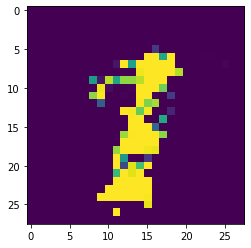

In [36]:
noise = tf.random.normal([10, noise_dim])
output = generator(noise, training=False).numpy()
plt.imshow(output[0].reshape(28,28))